In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
## Load the dataset
path = "../datasets/loan_data_set.csv"
loan_df = pd.read_csv(path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
## Numeric columns or real value columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

## Categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 
                    'Credit_History', 'Property_Area', 'Loan_Status']

## Not required
not_req_cols = ["Loan_ID"] 

In [7]:
## drop the loan ID column and set an index for the dataframe
loan_df.drop(not_req_cols, axis=1, inplace=True)
loan_df.reset_index
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Percentiles and Box Plots
    -> Percentiles can also be used to summarize the entire distribution.
    -> It is common to report the quartiles (25th, 50th and 75th percentiles) and the
       deciles (10th, 20th ,..., 90th percentiles)
       
#### Boxplot (Box and Whiskers plot)
     -> Boxplots are based on percentiles and give a quick way to visualize the distribution of data.
     -> In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there 
        which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

#### Further Reading
      https://plotly.com/python/box-plots/
      https://seaborn.pydata.org/generated/seaborn.boxplot.html
      https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

In [12]:
## Seaborn plots are not as interactive, so using plotly express instead
# sns.boxplot(y=loan_df["ApplicantIncome"])

## Boxplot using Plotly express
# loan_df_numeric = loan_df[numeric_cols].dropna(how='any')
fig = px.box(loan_df,x="Gender", y="LoanAmount")
fig.show()

## Frequency Tables and Histograms

#### Frequency Table
     -> A tally of the count of numeric data values that fall into a set of intervals(bins).
     -> A frequency table of a variable divides up the variable range into equally spaced segments, and tell us how 
        many values fall within each segment.
     -> It is important to include the empty bins; the fact that there are no values in that bins is useful information.
     -> It can also be useful to experiment with different bin sizes. Too Large - important features of the distribution can be obscured
        Too Small - result is too granular, not able to see the bigger picture.

#### Histograms
     -> A histogram is a way to visualize a frequency table with bins on the x axis and count on the y axis.
     -> While visually similar, bar charts should not be confused with histograms.
     -> histograms are used for numerical and bar charts are used for visualizing categorical data. 

#### References
     https://plotly.com/python/histograms/
     https://www.w3schools.com/python/matplotlib_histograms.asp

In [9]:
## Create a frequency table (pandas)
binned_income = pd.cut(loan_df["ApplicantIncome"],10)
binned_income.value_counts()

(69.15, 8235.0]       533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(32490.0, 40575.0]      4
(48660.0, 56745.0]      1
(56745.0, 64830.0]      1
(72915.0, 81000.0]      1
(24405.0, 32490.0]      0
(40575.0, 48660.0]      0
(64830.0, 72915.0]      0
Name: ApplicantIncome, dtype: int64

In [10]:
## Create a histogram for each attribute
for num_col in numeric_cols:
    # hist_fig = px.histogram(loan_df, x=num_col,nbins=10, color="Gender")
    hist_fig = px.histogram(loan_df, x=num_col,nbins=10, color="Loan_Status")
    hist_fig.show()

NameError: name 'px' is not defined

### Statistical Moments
    -> In statistical theory, location and variability are referred to as the first and second moments of distribution.
    -> The third and fourth moments are called skewness and kurtosis.
    -> Skewness - refers to whether the data is skewed to larger or smaller values
    -> Kurtosis - indicates the propensity of data to have extreme values.
    -> There are no metrics to measure them instead they are discovered through the displays above.

## Density Plots and Estimates

#### Density Plots
     -> A smoothed version of a histogram, which shows the distribution of data values as a continuous line.
     -> It is directly computed from the data through kernel density estimate (KDE).
     -> KDE - In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation.

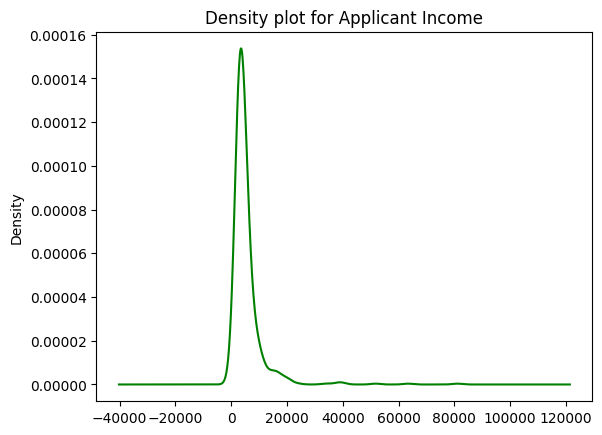

Text(0.5, 1.0, 'KDE - Density plot for Income')

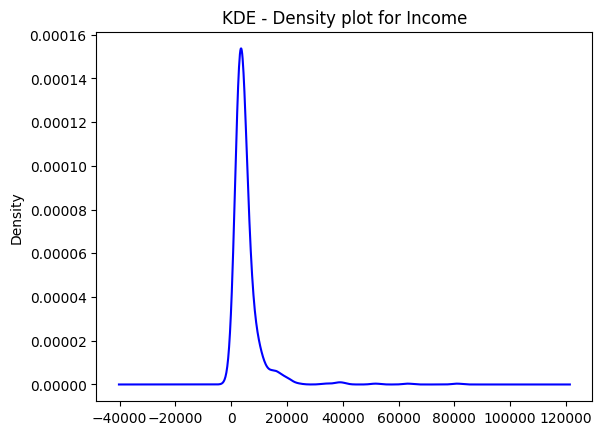

In [ ]:
## Create density plots or dist plots
# import plotly.figure_factory as ff
# density_fig = ff.create_distplot([loan_df["ApplicantIncome"]],group_labels=["ApplicantIncome"],bin_size=0.2)
# density_fig.show()

loan_df.ApplicantIncome.plot.density(color='green')
plt.title("Density plot for Applicant Income")
plt.show()
## Use KDE to plot the density plot
loan_df.ApplicantIncome.plot.kde(color='blue')
plt.title("KDE - Density plot for Income")

# loan_df["ApplicantIncome"].plot.density(ax=ax)
# ax.set_xlabel("Applicant Income")

### About Density Plots
    -> Density plots have an advantage over Histograms because they determine the Shape of the distribution more efficiently than histograms. 
    -> They do not have to depend on the number of bins used unlike in histograms.
    -> The region of plot with a higher peak is the region with maximum data points residing between those values.
